In [1]:
import nltk

In [2]:
import re

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
from nltk.probability import FreqDist

In [5]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


ID do corpus

In [6]:
nltk_id = 'machado'


In [7]:
nltk.download(nltk_id)

[nltk_data] Downloading package machado to /home/maycon/nltk_data...


True

In [8]:
print(nltk.corpus.machado.readme())

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

In [9]:
dom_casmurro = nltk.corpus.machado.raw('romance/marm08.txt')

In [10]:
print(dom_casmurro)

Romance, Dom Casmurro, 1899

Dom Casmurro

Texto de referência:

Obras Completas de Machado de Assis,
vol. I,

Nova Aguilar, Rio de
Janeiro, 1994.

 Publicado originalmente
pela Editora Garnier, Rio de Janeiro, 1899.

CAPÍTULO PRIMEIRO

DO TÍTULO

Uma noite destas, vindo da cidade
para o Engenho Novo, encontrei no trem da Central um rapaz aqui do bairro, que
eu conheço de vista e de chapéu. Cumprimentou-me, sentou-se ao pé de mim, falou
da Lua e dos ministros, e acabou recitando-me versos. A viagem era curta, e os
versos pode ser que não fossem inteiramente maus. Sucedeu, porém, que, como eu
estava cansado, fechei os olhos três ou quatro vezes; tanto bastou para que ele
interrompesse a leitura e metesse os versos no bolso.

 Continue, disse eu acordando.

 Já acabei, murmurou ele.

 São muito bonitos.

Vi-lhe fazer um gesto para
tirá-los outra vez do bolso, mas não passou do gesto; estava amuado. No dia seguinte
entrou a dizer de mim nomes feios, e acabou alcunhando-me Dom Casmurro.

Vamos fazer o seguinte:
* Selecionar apenas letras (remover pontuação, números e outros caracteres)
* Converter o texto para letra minúscula

In [11]:
dom_casmurro_letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', dom_casmurro.lower())

In [12]:
print(dom_casmurro_letras_min)

['romance', 'dom', 'casmurro', 'dom', 'casmurro', 'texto', 'de', 'referência', 'obras', 'completas', 'de', 'machado', 'de', 'assis', 'vol', 'i', 'nova', 'aguilar', 'rio', 'de', 'janeiro', 'publicado', 'originalmente', 'pela', 'editora', 'garnier', 'rio', 'de', 'janeiro', 'capítulo', 'primeiro', 'do', 'título', 'uma', 'noite', 'destas', 'vindo', 'da', 'cidade', 'para', 'o', 'engenho', 'novo', 'encontrei', 'no', 'trem', 'da', 'central', 'um', 'rapaz', 'aqui', 'do', 'bairro', 'que', 'eu', 'conheço', 'de', 'vista', 'e', 'de', 'chapéu', 'cumprimentou', 'me', 'sentou', 'se', 'ao', 'pé', 'de', 'mim', 'falou', 'da', 'lua', 'e', 'dos', 'ministros', 'e', 'acabou', 'recitando', 'me', 'versos', 'a', 'viagem', 'era', 'curta', 'e', 'os', 'versos', 'pode', 'ser', 'que', 'não', 'fossem', 'inteiramente', 'maus', 'sucedeu', 'porém', 'que', 'como', 'eu', 'estava', 'cansado', 'fechei', 'os', 'olhos', 'três', 'ou', 'quatro', 'vezes', 'tanto', 'bastou', 'para', 'que', 'ele', 'interrompesse', 'a', 'leitura',

Agora vamos remover as stopwords, ou seja, as palavras que não possuem valor semântico para a busca (exemplo: artigos e preposições. O NLTK fornece bibliotecas de stopwords para vários idiomas.

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/maycon/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [15]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [16]:
list_stopwords_portugues = set(stopwords)

In [17]:
dom_casmurro_letras_min_semstop = [w for w in dom_casmurro_letras_min if w not in list_stopwords_portugues]

In [18]:
print(dom_casmurro_letras_min_semstop)

['romance', 'dom', 'casmurro', 'dom', 'casmurro', 'texto', 'referência', 'obras', 'completas', 'machado', 'assis', 'vol', 'i', 'nova', 'aguilar', 'rio', 'janeiro', 'publicado', 'originalmente', 'editora', 'garnier', 'rio', 'janeiro', 'capítulo', 'primeiro', 'título', 'noite', 'destas', 'vindo', 'cidade', 'engenho', 'novo', 'encontrei', 'trem', 'central', 'rapaz', 'aqui', 'bairro', 'conheço', 'vista', 'chapéu', 'cumprimentou', 'sentou', 'pé', 'mim', 'falou', 'lua', 'ministros', 'acabou', 'recitando', 'versos', 'viagem', 'curta', 'versos', 'pode', 'inteiramente', 'maus', 'sucedeu', 'porém', 'cansado', 'fechei', 'olhos', 'três', 'quatro', 'vezes', 'tanto', 'bastou', 'interrompesse', 'leitura', 'metesse', 'versos', 'bolso', 'continue', 'disse', 'acordando', 'acabei', 'murmurou', 'bonitos', 'vi', 'fazer', 'gesto', 'tirá', 'los', 'outra', 'vez', 'bolso', 'passou', 'gesto', 'amuado', 'dia', 'seguinte', 'entrou', 'dizer', 'mim', 'nomes', 'feios', 'acabou', 'alcunhando', 'dom', 'casmurro', 'viz

Também podemos trabalhar com radicais (stemming). Existem duas formas aqui:

*   Stemming - "corta" as palavras usando a raiz como base
*   Lemmatization - reduz as palavras a forma verdadeira da raiz

Exemplo: andando

*   Stemming - anda
*   Lemmatization - andar

Lemmatization é uma função mais complexa, portanto, se o texto for muito grande pode demorar um pouco para executá-la.

O nltk possui duas funções para stemming: Porter (PorterStemmer) e Lancaster (LancasterStemmer). Ele também possui um lemmatizador (WordNetLemmatizer).


In [19]:
porter = nltk.PorterStemmer()

In [20]:
dom_casmurro_letras_min_semstop_stem = [porter.stem(t) for t in dom_casmurro_letras_min_semstop]

In [21]:
print(dom_casmurro_letras_min_semstop_stem)

['romanc', 'dom', 'casmurro', 'dom', 'casmurro', 'texto', 'referência', 'obra', 'completa', 'machado', 'assi', 'vol', 'i', 'nova', 'aguilar', 'rio', 'janeiro', 'publicado', 'originalment', 'editora', 'garnier', 'rio', 'janeiro', 'capítulo', 'primeiro', 'título', 'noit', 'desta', 'vindo', 'cidad', 'engenho', 'novo', 'encontrei', 'trem', 'central', 'rapaz', 'aqui', 'bairro', 'conheço', 'vista', 'chapéu', 'cumpriment', 'sentou', 'pé', 'mim', 'falou', 'lua', 'ministro', 'acab', 'recitando', 'verso', 'viagem', 'curta', 'verso', 'pode', 'inteirament', 'mau', 'sucedeu', 'porém', 'cansado', 'fechei', 'olho', 'trê', 'quatro', 'veze', 'tanto', 'bastou', 'interrompess', 'leitura', 'metess', 'verso', 'bolso', 'continu', 'diss', 'acordando', 'acabei', 'murmur', 'bonito', 'vi', 'fazer', 'gesto', 'tirá', 'lo', 'outra', 'vez', 'bolso', 'passou', 'gesto', 'amuado', 'dia', 'seguint', 'entrou', 'dizer', 'mim', 'nome', 'feio', 'acab', 'alcunhando', 'dom', 'casmurro', 'vizinho', 'gostam', 'hábito', 'reclus

Vamos ver a frequência de ocorrência dos termos e tentar enxergar diferenças entre o texto processado com e sem stemming.

In [22]:
freq_sem_stem = FreqDist(dom_casmurro_letras_min_semstop)
freq_com_stem = FreqDist(dom_casmurro_letras_min_semstop_stem)

In [23]:
print("20 palavras mais frequentes sem stem:")
print(freq_sem_stem.most_common(20))

20 palavras mais frequentes sem stem:
[('capitu', 341), ('mãe', 229), ('dias', 192), ('tudo', 189), ('capítulo', 188), ('disse', 184), ('casa', 170), ('olhos', 164), ('mim', 162), ('josé', 160), ('assim', 158), ('vez', 147), ('agora', 146), ('ainda', 141), ('outra', 138), ('nada', 135), ('lo', 127), ('tão', 122), ('tempo', 120), ('padre', 119)]


In [24]:
print("20 palavras mais frequentes com stem:")
print(freq_com_stem.most_common(20))

20 palavras mais frequentes com stem:
[('capitu', 341), ('dia', 302), ('mãe', 230), ('capítulo', 191), ('outra', 191), ('tudo', 189), ('casa', 186), ('diss', 184), ('outro', 182), ('olho', 167), ('mim', 162), ('josé', 160), ('assim', 158), ('lo', 151), ('vez', 147), ('agora', 146), ('ainda', 141), ('nada', 136), ('palavra', 130), ('tempo', 125)]


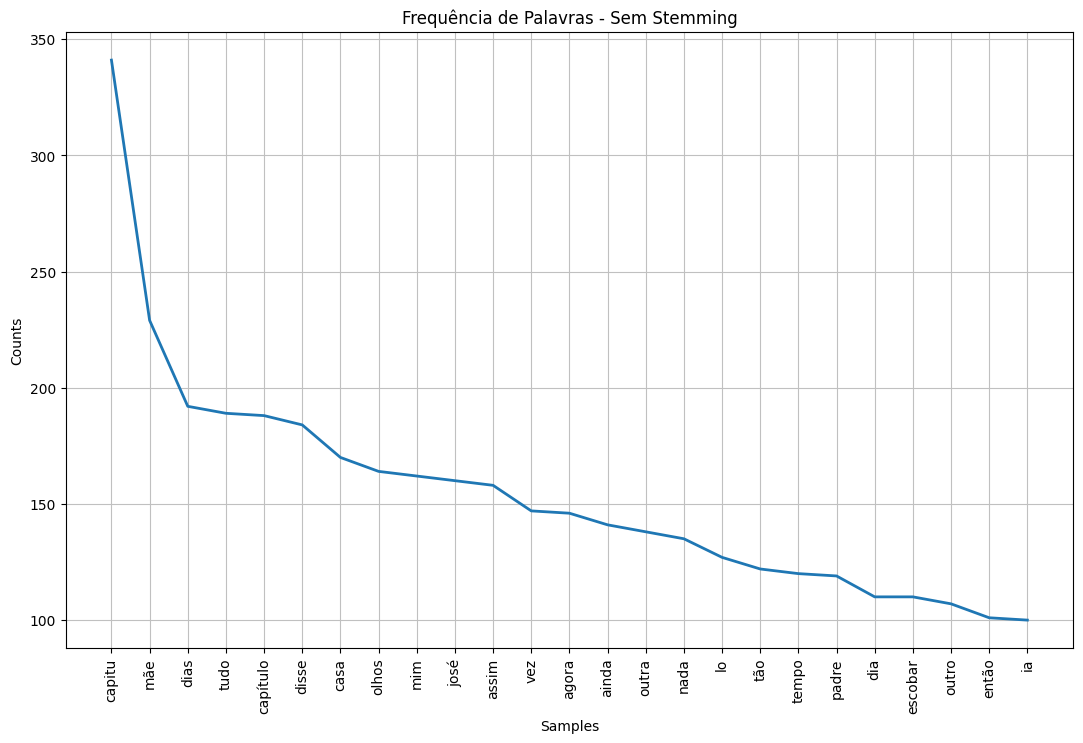

<AxesSubplot: title={'center': 'Frequência de Palavras - Sem Stemming'}, xlabel='Samples', ylabel='Counts'>

In [25]:
plt.figure(figsize = (13, 8))
freq_sem_stem.plot(25, title = "Frequência de Palavras - Sem Stemming")

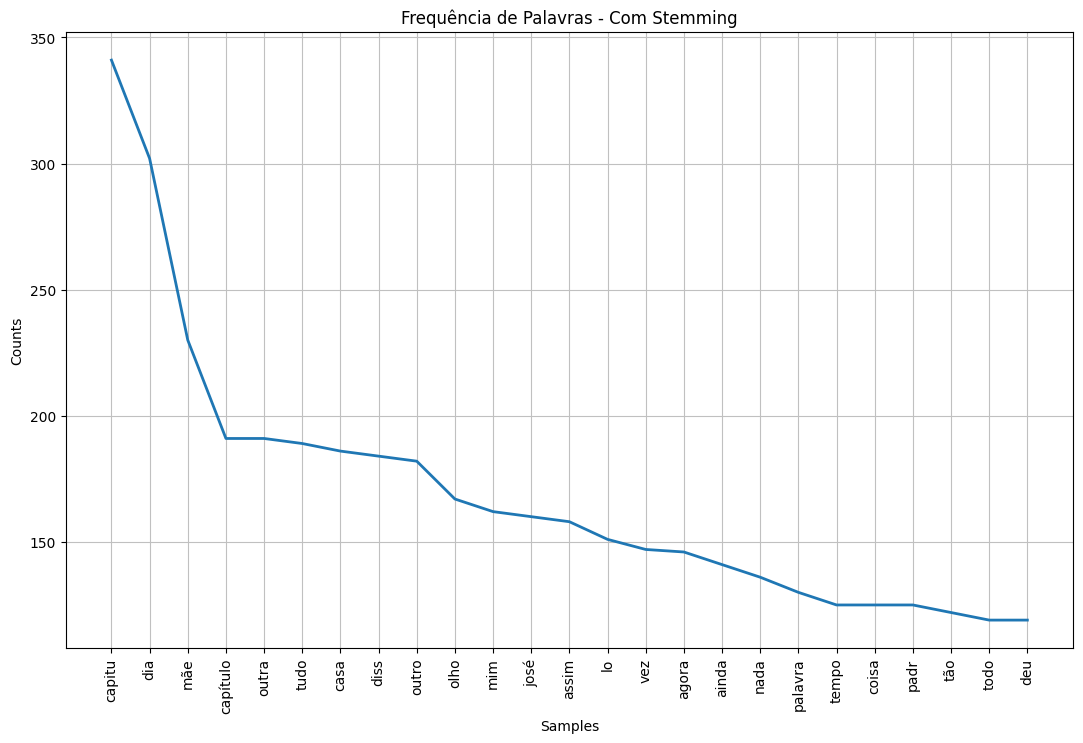

<AxesSubplot: title={'center': 'Frequência de Palavras - Com Stemming'}, xlabel='Samples', ylabel='Counts'>

In [26]:
plt.figure(figsize = (13, 8))
freq_com_stem.plot(25, title = "Frequência de Palavras - Com Stemming")